# Div Arb Straight Up

**The Goal of this notebook is to locate areas of "straight up arbitrage" where we can gather at least .5% 2-day profit on liquid options**

*We Define "Straight Up Arb" as *Arbitrage from purchasing a put close to expiry where*     
`Div*(1-tax) - Cost_option > Underlying - Strike`   
We define percentage of arbitrage as The Percentage of Arbitrage that we can get from this as   
`Div * (1 - tax) / (Underlying + Cost_Option)`   
Since we can put on a position daily we would be satisfied with anything like a .2% return (keep in mind that our profits only get compounded every 1.5 months since there is a 1.5 month delay before getting payment from the dividend. In fact we may slowly bleed liquidity until dividend payments start coming through).

In [ ]:
#Dividend*(1-tax)/(Strike+Cost)

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from bisect import bisect_left

In [12]:
pd.set_option('display.max_columns', 500)
PATH_TO_DIV = "gs://ucf-data/dividends/"
PATH_TO_OPT = "gs://ucf-data/Options/"
PATH_TO_DAILY = "gs://ucf-data/daily_stocks.csv"

In [132]:
stonks = pd.read_csv(PATH_TO_DAILY)    #pd.read_csv('prupes_stonks.csv')

In [136]:
def get_dividend_df(ticker):
    df = pd.read_csv('{}{}.csv'.format(PATH_TO_DIV,ticker.upper()))
    df['DATE'] = df.apply (lambda row: datetime.strptime(row['exOrEffDate'],"%m/%d/%Y"), axis=1)
    return df
def get_opt_df(ticker):
    opts = pd.read_csv('{}{}.csv'.format(PATH_TO_OPT,ticker.upper()))
    opts['date'] = opts['date'].apply(str)
    opts['DATE'] = opts.apply (lambda row: datetime.strptime(row['date'],"%Y%m%d"), axis=1)
    return opts
def get_daily_df(ticker):
    daily = pd.read_csv('{}{}/{}_day_close_.csv'.format(PATH_TO_DAILY, ticker.upper(), ticker.upper()))
    daily['DATE'] = daily.apply(lambda row: datetime.strptime(row['timestamp'],"%Y-%m-%d"), axis=1)
    return daily
def get_stonks_df(ticker):
    stocks = stonks[stonks['TICKER'] == ticker]
    stocks['date'] = stocks['date'].apply(str)
    stocks['DATE'] = stocks.apply (lambda row: datetime.strptime(row['date'],"%Y%m%d"), axis=1)
    return stocks
def convert_date(s):
    a = datetime.strptime(s,"%d/%m/%Y")
    return a.strftime("%Y%m%d")
def previous_day(dates, current_day):
    prev = current_day - timedelta(days=1)
    #print(prev)
    insertion_point = bisect_left(dates, current_day)-1
    if insertion_point == -1:
        return False
    else:
        return dates[insertion_point]
def gen_dates(df):
    return sorted(datetime.strptime(str(elt), "%Y%m%d") for elt in list(df.date))


In [49]:
get_daily_df("AAPL").head()

,timestamp,open,high,low,close,volume,millis,timestamp.1,time_of_last_tick
0,2000-01-03,3.746,4.018,3.632,3.750,125216004.0,946909800.0,2000-01-03,2000-01-03
1,2000-01-04,3.866,3.951,3.614,3.866,120027600.0,946996200.0,2000-01-04,2000-01-04
2,2000-01-05,3.706,3.949,3.679,3.703,182036428.0,947082600.0,2000-01-05,2000-01-05
3,2000-01-06,3.791,3.822,3.393,3.793,181484828.0,947169000.0,2000-01-06,2000-01-06
4,2000-01-07,3.447,3.608,3.411,3.447,106187200.0,947255400.0,2000-01-07,2000-01-07


In [19]:
get_opt_df("AAPL").head()

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
0,101594,20150630,AAPL 150702C100000,1,20150702,20150630.0,C,100000,25.55,25.65,15,6,1.657665,0.971807,0.004203,0.601158,-90.97760,108201233,1,0,100,0,125.42603,w,NaN,NaN,3783310,AAPL,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
1,101594,20150630,AAPL 150702C105000,1,20150702,20150630.0,C,105000,20.55,20.65,16,7,1.352380,0.966076,0.006003,0.699296,-86.50655,108201234,1,0,100,0,125.42603,w,NaN,NaN,3783310,AAPL,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
2,101594,20150630,AAPL 150702C107000,1,20150702,20150630.0,C,107000,18.25,18.80,10,0,1.115425,0.975360,0.005581,0.536270,-54.77605,108249631,1,0,100,0,125.42603,w,NaN,NaN,3783310,AAPL,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
3,101594,20150630,AAPL 150702C108000,1,20150702,NaN,C,108000,17.05,17.80,0,0,NaN,NaN,NaN,NaN,NaN,108249632,1,0,100,0,125.42603,w,NaN,NaN,3783310,AAPL,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
4,101594,20150630,AAPL 150702C109000,1,20150702,20150630.0,C,109000,16.55,16.65,286,366,1.112591,0.959576,0.008420,0.807882,-82.13522,108051023,1,0,100,0,125.42603,w,NaN,NaN,3783310,AAPL,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0


In [23]:
get_dividend_df("AAPL").head()

,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6
0,11/07/2019,Cash,$0.77,10/30/2019,11/11/2019,11/14/2019,NaN
1,08/09/2019,Cash,$0.77,07/30/2019,08/12/2019,08/15/2019,NaN
2,05/10/2019,Cash,$0.77,04/30/2019,05/13/2019,05/16/2019,NaN
3,02/08/2019,Cash,$0.73,01/29/2019,02/11/2019,02/14/2019,NaN
4,11/08/2018,Cash,$0.73,11/01/2018,11/12/2018,11/15/2018,NaN


## Step 1: Merge 3 Tables Together (Code)

In [138]:
def merge(ticker):
    dividends = get_dividend_df(ticker)
    opts = get_opt_df(ticker)
    daily = get_stonks_df(ticker)#get_daily_df(ticker)
    temp = pd.merge(dividends, daily, on='DATE', how='outer')
    last = pd.merge(opts, temp, on='DATE')
    return last

In [139]:
def merge_before(ticker, days):
    dividends = get_dividend_df(ticker)
    dividends['DATE'] = dividends.apply (lambda row: row['DATE'] - timedelta(days=days), axis=1)
    opts = get_opt_df(ticker)
    daily = get_stonks_df(ticker)#get_daily_df(ticker)
    
    
    temp = pd.merge(dividends, daily, on='DATE', how='outer')
    last = pd.merge(opts, temp, on='DATE')
    return last

In [182]:
TAX = .25
def calculate_arb(row):
    #Div*(1-tax) - Cost_option < Underlying - Strike
    Div = float(row['amount'][1:])*(1-TAX)
    Cost_Option = row['best_offer']
    Call = row['cp_flag'] == 'C'
    Underlying = row['PRC']
    Strike = row['strike_price']/1000
    ITM = Strike > Underlying
    
    #print(Div, Cost_Option, Call, Underlying, Strike)
    

    if not Call and ITM:
        return Strike + Div - Underlying - Cost_Option
    return 0

In [183]:
def percent_arb(row):
    #Div * (1 - tax) / (Underlying + Cost_Option)
    Div = float(row['amount'][1:])*(1-TAX)
    Cost_Option = row['best_offer']
    Call = row['cp_flag'] == 'C'
    Underlying = row['PRC']
    Strike = row['strike_price']/1000
    ITM = Strike > Underlying
    
    #print(Div, Cost_Option, Call, Underlying, Strike)
    

    if not Call and ITM:
        return Div/(Underlying + Cost_Option)
    return 0

In [184]:
def get_arb(ticker):
    try:
        df = merge_before(ticker,1)
        filtered = df[df.exOrEffDate.notnull()]
        filtered['ARB'] = filtered.apply(lambda row: calculate_arb(row), axis=1)
        filtered['PNL'] = filtered.apply(lambda row: percent_arb(row), axis=1)
        return filtered[filtered['ARB'] > 0]
    except:
        print("Incomplete Data for {}".format(ticker))
        return 0

In [191]:
%%capture --no-stdout

arbs = get_arb("IBM")
for ticker in stonks.TICKER.unique():
    print(ticker)
    #ticker_arb = get_arb(ticker)
    try:
        data = get_arb(ticker)
        """
        if not data.empty:
            print(data)
            break
        """
        arbs = pd.concat([arbs, data])
    except:
        pass
    #print(get_arb(ticker))

JJSF
DGSE
Incomplete Data for DGSE
DGC
Incomplete Data for DGC
PLXS
Incomplete Data for PLXS
HGR
Incomplete Data for HGR
nan
Incomplete Data for nan
HNGR
Incomplete Data for HNGR
SUNW
Incomplete Data for SUNW
JAVA
Incomplete Data for JAVA
ORCL
MSFT
Incomplete Data for MSFT
TW
TROW
HON
AMRC
Incomplete Data for AMRC
AKN
Incomplete Data for AKN
AKRX
Incomplete Data for AKRX
TECD
Incomplete Data for TECD
RGEN
Incomplete Data for RGEN
AT
LSBX
Incomplete Data for LSBX
BWC
Incomplete Data for BWC
BWXT
FO
Incomplete Data for FO
BEAM
Incomplete Data for BEAM
BWINB
Incomplete Data for BWINB
PTVCB
INDB
DMC
Incomplete Data for DMC
DSS
Incomplete Data for DSS
AVAN
Incomplete Data for AVAN
CLDX
Incomplete Data for CLDX
HVT
CY
TMP
BCPC
XOMA
Incomplete Data for XOMA
AMAG
Incomplete Data for AMAG
TCB
Incomplete Data for TCB
TCF
ASTE
WERN
SKYW
REFR
Incomplete Data for REFR
AMWD
Incomplete Data for AMWD
ADM
RNT
Incomplete Data for RNT
AAN
VIVO
APAT
Incomplete Data for APAT
CLFD
Incomplete Data for CLFD
S

AM
CHKR
NDRO
Incomplete Data for NDRO
PVL
Incomplete Data for PVL
IPFF
Incomplete Data for IPFF
MN
VAC
KBWB
Incomplete Data for KBWB
DLPH
Incomplete Data for DLPH
APTV
PACD
Incomplete Data for PACD
ACHC
Incomplete Data for ACHC
ANGI
Incomplete Data for ANGI
CLVS
Incomplete Data for CLVS
GRPN
Incomplete Data for GRPN
NLNK
Incomplete Data for NLNK
RECV
Incomplete Data for RECV
LLEX
Incomplete Data for LLEX
SOCL
Incomplete Data for SOCL
BCEI
Incomplete Data for BCEI
ETAK
Incomplete Data for ETAK
TEUM
Incomplete Data for TEUM
GREK
Incomplete Data for GREK
LPI
Incomplete Data for LPI
BBH
Incomplete Data for BBH
OIH
Incomplete Data for OIH
PPH
Incomplete Data for PPH
RTH
Incomplete Data for RTH
SMH
Incomplete Data for SMH
WPX
Incomplete Data for WPX
CNDO
Incomplete Data for CNDO
FBIO
Incomplete Data for FBIO
MCEP
TRIP
Incomplete Data for TRIP
ZNGA
Incomplete Data for ZNGA
GWRE
Incomplete Data for GWRE
URTH
Incomplete Data for URTH
JE
POST
Incomplete Data for POST
EELV
Incomplete Data for EEL

PINC
Incomplete Data for PINC
SQBG
Incomplete Data for SQBG
XLRN
Incomplete Data for XLRN
DOOR
Incomplete Data for DOOR
AR
Incomplete Data for AR
BRX
BURL
Incomplete Data for BURL
CXP
CPS
Incomplete Data for CPS
DBEU
Incomplete Data for DBEU
JDST
Incomplete Data for JDST
JNUG
Incomplete Data for JNUG
ESRT
ALOG
Incomplete Data for ALOG
FDIS
Incomplete Data for FDIS
FENY
Incomplete Data for FENY
FNCL
Incomplete Data for FNCL
FHLC
Incomplete Data for FHLC
FIDU
Incomplete Data for FIDU
FTEC
Incomplete Data for FTEC
FMAT
Incomplete Data for FMAT
WUBA
Incomplete Data for WUBA
SHYG
Incomplete Data for SHYG
OCIP
Incomplete Data for OCIP
PAGP
NOBL
Incomplete Data for NOBL
QTS
RMAX
IPO
Incomplete Data for IPO
SRLP
OMF
Incomplete Data for OMF
VEEV
Incomplete Data for VEEV
VJET
Incomplete Data for VJET
ESNT
Incomplete Data for ESNT
ADXS
Incomplete Data for ADXS
AERI
Incomplete Data for AERI
COMM
Incomplete Data for COMM
CRTO
Incomplete Data for CRTO
EIGI
Incomplete Data for EIGI
FATE
Incomplete Da

Incomplete Data for EYES
FGEN
Incomplete Data for FGEN
FRPT
Incomplete Data for FRPT
HABT
Incomplete Data for HABT
MRO
AROW
INCR
Incomplete Data for INCR
SYNH
Incomplete Data for SYNH
PDBC
Incomplete Data for PDBC
UST
Incomplete Data for UST
PRAH
Incomplete Data for PRAH
SKIS
Incomplete Data for SKIS
TBK
Incomplete Data for TBK
UPLD
Incomplete Data for UPLD
XENE
Incomplete Data for XENE
KLXI
Incomplete Data for KLXI
LC
Incomplete Data for LC
SBIO
Incomplete Data for SBIO
NEWR
Incomplete Data for NEWR
ONDK
Incomplete Data for ONDK
QSR
TRCO
Incomplete Data for TRCO
WK
Incomplete Data for WK
BLCM
Incomplete Data for BLCM
CTSO
Incomplete Data for CTSO
HDP
Incomplete Data for HDP
JRVR
MOMO
TRIL
Incomplete Data for TRIL
VNOM
LMRK
UE
JPEM
Incomplete Data for JPEM
SHAK
Incomplete Data for SHAK
VSTO
Incomplete Data for VSTO
EURN
Incomplete Data for EURN
ASND
Incomplete Data for ASND
AVGR
Incomplete Data for AVGR
ONCE
Incomplete Data for ONCE
VUZI
Incomplete Data for VUZI
DEA
NVTA
Incomplete Dat

IMOS
BL
Incomplete Data for BL
CRSP
Incomplete Data for CRSP
FRTA
Incomplete Data for FRTA
IRTC
Incomplete Data for IRTC
OBLN
Incomplete Data for OBLN
RARX
Incomplete Data for RARX
SRAX
Incomplete Data for SRAX
TUSK
XOG
Incomplete Data for XOG
GECC
Incomplete Data for GECC
LW
GT
GOLF
ADSW
Incomplete Data for ADSW
ARCH
CWH
SD
Incomplete Data for SD
ZTO
Incomplete Data for ZTO
GDS
Incomplete Data for GDS
SND
Incomplete Data for SND
TPIV
Incomplete Data for TPIV
MRKR
Incomplete Data for MRKR
CWEB
Incomplete Data for CWEB
GVIP
Incomplete Data for GVIP
ATH
Incomplete Data for ATH
CNDT
Incomplete Data for CNDT
HGV
Incomplete Data for HGV
PK
BPOP
HYLB
Incomplete Data for HYLB
IIPR
WRD
Incomplete Data for WRD
ICHR
Incomplete Data for ICHR
PVAC
Incomplete Data for PVAC
TRVG
Incomplete Data for TRVG
FTI
Incomplete Data for FTI
VREX
Incomplete Data for VREX
BOH
JAG
Incomplete Data for JAG
JELD
Incomplete Data for JELD
UVV
FRAC
Incomplete Data for FRAC
REVG
ANAB
Incomplete Data for ANAB
JNCE
Incom

JNJ
GLW
PPG
PPL
CTU
Incomplete Data for CTU
MMM
MRK
MOT
Incomplete Data for MOT
MSI
CMN
Incomplete Data for CMN
CMD
FE
SCG
Incomplete Data for SCG
PGN
Incomplete Data for PGN
CPK
CMS
EAT
CHD
CINF
WEC
TXT
CTAS
PEG
CIA
Incomplete Data for CIA
HAL
MDU
CZN
Incomplete Data for CZN
FTR
XEL
ETR
WR
Incomplete Data for WR
EVRG
AEP
FPL
Incomplete Data for FPL
NEE
ALE
ASH
EQT
KSE
Incomplete Data for KSE
OGE
CDE
Incomplete Data for CDE
PBI
COHR
Incomplete Data for COHR
OSCI
Incomplete Data for OSCI
ARNC
NOC
RTN
AVA
AEE
SGP
Incomplete Data for SGP
CMA
WPS
Incomplete Data for WPS
TEG
Incomplete Data for TEG
CBSH
OKE
HSC
CPB
WHR
JCS
Incomplete Data for JCS
CAR
Incomplete Data for CAR
HRS
Incomplete Data for HRS
NFG
F
DOV
CTGX
Incomplete Data for CTGX
CTG
CMTL
MEE
Incomplete Data for MEE
DIS
CTWS
Incomplete Data for CTWS
SNS
Incomplete Data for SNS
BH
Incomplete Data for BH
SJI
ASA
LTR
Incomplete Data for LTR
L
K
VAR
Incomplete Data for VAR
OHGI
Incomplete Data for OHGI
STL
CSL
CLF
CTB
CUZ
CBRL
R
AVT


Incomplete Data for SHLM
VGZ
Incomplete Data for VGZ
MYL
Incomplete Data for MYL
SBCF
Incomplete Data for SBCF
RJF
Incomplete Data for RJF
BCS
Incomplete Data for BCS
GG
Incomplete Data for GG
HOG
Incomplete Data for HOG
KBH
Incomplete Data for KBH
BDN
Incomplete Data for BDN
TOL
Incomplete Data for TOL
APC
Incomplete Data for APC
BPL
Incomplete Data for BPL
C
Incomplete Data for C
ECL
Incomplete Data for ECL
HRP
Incomplete Data for HRP
EQC
Incomplete Data for EQC
UXG
Incomplete Data for UXG
MUX
Incomplete Data for MUX
PPC
Incomplete Data for PPC
SVM
Incomplete Data for SVM
UNM
Incomplete Data for UNM
SON
Incomplete Data for SON
Y
Incomplete Data for Y
AWR
Incomplete Data for AWR
BBT
Incomplete Data for BBT
CHP
Incomplete Data for CHP
TINY
Incomplete Data for TINY
TURN
Incomplete Data for TURN
SPAR
Incomplete Data for SPAR
SEH
Incomplete Data for SEH
STAA
Incomplete Data for STAA
NHC
Incomplete Data for NHC
STT
Incomplete Data for STT
UHT
Incomplete Data for UHT
STC
Incomplete Data for

Incomplete Data for CPSS
PDCO
Incomplete Data for PDCO
RDN
Incomplete Data for RDN
UFI
Incomplete Data for UFI
MGA
Incomplete Data for MGA
RIMG
Incomplete Data for RIMG
QUMU
Incomplete Data for QUMU
RRA
Incomplete Data for RRA
NEOP
Incomplete Data for NEOP
NAVB
Incomplete Data for NAVB
KAI
Incomplete Data for KAI
LGND
Incomplete Data for LGND
TCO
Incomplete Data for TCO
GFRE
Incomplete Data for GFRE
GURE
Incomplete Data for GURE
CKH
Incomplete Data for CKH
HMSY
Incomplete Data for HMSY
SM
Incomplete Data for SM
BBOX
Incomplete Data for BBOX
PESI
Incomplete Data for PESI
ATTU
Incomplete Data for ATTU
UVE
Incomplete Data for UVE
ULBI
Incomplete Data for ULBI
AEM
Incomplete Data for AEM
RG
Incomplete Data for RG
RCI
Incomplete Data for RCI
STKL
Incomplete Data for STKL
TARO
Incomplete Data for TARO
OPY
Incomplete Data for OPY
RADI
Incomplete Data for RADI
RADA
Incomplete Data for RADA
TDSC
Incomplete Data for TDSC
DDD
Incomplete Data for DDD
UFCS
Incomplete Data for UFCS
SPNS
Incomplete D

Incomplete Data for CAM
AVZ
Incomplete Data for AVZ
IVZ
Incomplete Data for IVZ
AVX
Incomplete Data for AVX
WABC
Incomplete Data for WABC
ADMP
Incomplete Data for ADMP
AXO
Incomplete Data for AXO
HOOK
Incomplete Data for HOOK
BREW
Incomplete Data for BREW
IART
Incomplete Data for IART
DNR
Incomplete Data for DNR
KFRC
Incomplete Data for KFRC
RWT
Incomplete Data for RWT
BTN
Incomplete Data for BTN
PLI
Incomplete Data for PLI
GSIG
Incomplete Data for GSIG
NOVT
Incomplete Data for NOVT
PDX
Incomplete Data for PDX
MD
Incomplete Data for MD
ACGL
Incomplete Data for ACGL
SMSI
Incomplete Data for SMSI
CRAY
Incomplete Data for CRAY
THG
Incomplete Data for THG
CPC
Incomplete Data for CPC
DO
Incomplete Data for DO
RE
Incomplete Data for RE
DVA
Incomplete Data for DVA
BAP
Incomplete Data for BAP
ERIE
Incomplete Data for ERIE
MYGN
Incomplete Data for MYGN
POOL
Incomplete Data for POOL
RICK
Incomplete Data for RICK
RSYS
Incomplete Data for RSYS
SNUS
Incomplete Data for SNUS
OGXI
Incomplete Data for

Incomplete Data for PLX
SBSI
BDE
Incomplete Data for BDE
CLAR
WCN
FII
EEP
Incomplete Data for EEP
AMT
CLS
Incomplete Data for CLS
GIL
ENG
Incomplete Data for ENG
BMTC
HZO
Incomplete Data for HZO
SRE
DOX
COBZ
Incomplete Data for COBZ
CTSH
PEIX
Incomplete Data for PEIX
CASM
Incomplete Data for CASM
MSTR
Incomplete Data for MSTR
SJR
EPD
RSG
BELFB
ELON
Incomplete Data for ELON
RBCAA
CSGP
Incomplete Data for CSGP
UCFC
HTBK
UBA
XL
Incomplete Data for XL
CCI
AU
EBAY
GIB
Incomplete Data for GIB
BUSE
CCNE
PB
TCHC
Incomplete Data for TCHC
FNHC
INO
Incomplete Data for INO
XLB
Incomplete Data for XLB
XLV
Incomplete Data for XLV
XLP
Incomplete Data for XLP
XLY
Incomplete Data for XLY
XLE
Incomplete Data for XLE
XLF
Incomplete Data for XLF
XLI
Incomplete Data for XLI
XLK
Incomplete Data for XLK
XLU
Incomplete Data for XLU
RFIL
SCSS
Incomplete Data for SCSS
SNBR
Incomplete Data for SNBR
BCOR
Incomplete Data for BCOR
AXL
Incomplete Data for AXL
ETM
HT
LACO
Incomplete Data for LACO
GDEN
NVDA
NVGN
Incom

IWS
Incomplete Data for IWS
IWP
Incomplete Data for IWP
IWR
Incomplete Data for IWR
IGV
Incomplete Data for IGV
IGW
Incomplete Data for IGW
SOXX
Incomplete Data for SOXX
IGN
Incomplete Data for IGN
ONH
Incomplete Data for ONH
ZMH
Incomplete Data for ZMH
ZBH
ACN
GLAD
OMCL
Incomplete Data for OMCL
CP
EFA
Incomplete Data for EFA
ECA
BG
FRO
BUH
Incomplete Data for BUH
CS
CCRN
Incomplete Data for CCRN
CHFN
Incomplete Data for CHFN
ONCY
Incomplete Data for ONCY
WLP
Incomplete Data for WLP
ANTM
EPP
Incomplete Data for EPP
IGE
Incomplete Data for IGE
ILF
Incomplete Data for ILF
PFG
DB
AHS
Incomplete Data for AHS
AYI
AAP
IXP
Incomplete Data for IXP
IXN
Incomplete Data for IXN
IXJ
Incomplete Data for IXJ
IXC
Incomplete Data for IXC
KB
LYG
ACH
Incomplete Data for ACH
FVE
Incomplete Data for FVE
NMR
PRU
WFD
Incomplete Data for WFD
WNEB
CNC
Incomplete Data for CNC
VXF
Incomplete Data for VXF
SSI
SYNA
Incomplete Data for SYNA
CCOI
GME
SXL
Incomplete Data for SXL
MANT
UCBI
ABG
Incomplete Data for ABG

Incomplete Data for ROLL
RUTH
UEPS
Incomplete Data for UEPS
VTI
Incomplete Data for VTI
AMP
GCA
Incomplete Data for GCA
EVRI
Incomplete Data for EVRI
GLP
PID
Incomplete Data for PID
PFM
Incomplete Data for PFM
GENE
Incomplete Data for GENE
GHDX
Incomplete Data for GHDX
SNSS
Incomplete Data for SNSS
VPRT
Incomplete Data for VPRT
CMPR
Incomplete Data for CMPR
FNF
HAQ
Incomplete Data for HAQ
PIP
Incomplete Data for PIP
PXJ
Incomplete Data for PXJ
SCU
Incomplete Data for SCU
DHT
FBIZ
Incomplete Data for FBIZ
GASS
Incomplete Data for GASS
ISBC
WAUW
Incomplete Data for WAUW
WSBF
AMSF
BULK
Incomplete Data for BULK
NM
IRBT
Incomplete Data for IRBT
OIIM
Incomplete Data for OIIM
SEED
Incomplete Data for SEED
SPWR
Incomplete Data for SPWR
SPWRA
Incomplete Data for SPWRA
UAA
Incomplete Data for UAA
WSPI
Incomplete Data for WSPI
WWWW
Incomplete Data for WWWW
WEB
Incomplete Data for WEB
BKD
Incomplete Data for BKD
CCO
Incomplete Data for CCO
ICE
PDS
SDY
Incomplete Data for SDY
KCE
Incomplete Data fo

Incomplete Data for PCS
TMUS
Incomplete Data for TMUS
GWX
Incomplete Data for GWX
GWL
Incomplete Data for GWL
SPDW
Incomplete Data for SPDW
UNG
Incomplete Data for UNG
BLV
Incomplete Data for BLV
BIV
Incomplete Data for BIV
BSV
Incomplete Data for BSV
QQQ
Incomplete Data for QQQ
OPTT
Incomplete Data for OPTT
PNNT
TFSL
ACM
Incomplete Data for ACM
BGS
CAP
Incomplete Data for CAP
CLR
Incomplete Data for CLR
FRI
Incomplete Data for FRI
FEX
Incomplete Data for FEX
FXD
Incomplete Data for FXD
FXG
Incomplete Data for FXG
FXN
Incomplete Data for FXN
FXO
Incomplete Data for FXO
FXH
Incomplete Data for FXH
FXR
Incomplete Data for FXR
FXZ
Incomplete Data for FXZ
FXL
Incomplete Data for FXL
FXU
Incomplete Data for FXU
FTC
Incomplete Data for FTC
SLS
Incomplete Data for SLS
SKH
Incomplete Data for SKH
BIL
Incomplete Data for BIL
TRS
Incomplete Data for TRS
BIOD
Incomplete Data for BIOD
ALBO
Incomplete Data for ALBO
CAVM
Incomplete Data for CAVM
CLNE
Incomplete Data for CLNE
FOLD
Incomplete Data for

Incomplete Data for UNL
CO
CXDC
Incomplete Data for CXDC
FTNT
Incomplete Data for FTNT
INDY
Incomplete Data for INDY
VCIT
Incomplete Data for VCIT
VCLT
Incomplete Data for VCLT
ZAGG
Incomplete Data for ZAGG
CCM
Incomplete Data for CCM
LBJ
Incomplete Data for LBJ
CZI
Incomplete Data for CZI
YANG
Incomplete Data for YANG
CZM
Incomplete Data for CZM
YINN
Incomplete Data for YINN
CHIQ
Incomplete Data for CHIQ
CHIX
Incomplete Data for CHIX
CHIB
Incomplete Data for CHIB
QQQC
Incomplete Data for QQQC
CLY
Incomplete Data for CLY
IGLB
Incomplete Data for IGLB
KRA
Incomplete Data for KRA
ONP
Incomplete Data for ONP
PEB
MUNI
Incomplete Data for MUNI
SCHG
Incomplete Data for SCHG
SCHV
Incomplete Data for SCHV
HEDJ
Incomplete Data for HEDJ
TAT
Incomplete Data for TAT
CBPO
Incomplete Data for CBPO
UBT
Incomplete Data for UBT
SCHE
Incomplete Data for SCHE
SCHC
Incomplete Data for SCHC
EUFN
Incomplete Data for EUFN
MSGN
Incomplete Data for MSGN
OXBT
Incomplete Data for OXBT
TENX
Incomplete Data for TE

In [186]:
temp = arbs[arbs["volume"] > 0]

In [187]:
temp

,secid,date_x,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,DATE,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6,PERMNO,date_y,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX,ARB,PNL
85366,105785,20161115,HON1 161118P115000,1,20161118,20161115.0,P,115000,1.79,2.29,2,122,NaN,NaN,NaN,NaN,NaN,113175529,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2016-11-15,11/16/2016,Cash,$0.665,10/28/2016,11/18/2016,12/09/2016,NaN,10145.0,20161115,HON,112.09000,113.440,113.120,113.11000,113.12000,113.06000,0.000708,0.08875,0.004322
229062,105785,20180221,HON 180223P157500,1,20180223,20180221.0,P,157500,2.13,4.00,12,46,NaN,NaN,NaN,NaN,NaN,118622701,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03000,156.860,154.050,154.10001,154.11000,154.98000,-0.001879,0.00875,0.003535
229063,105785,20180221,HON 180223P160000,1,20180223,20180221.0,P,160000,5.80,6.50,7,115,NaN,NaN,NaN,NaN,NaN,118622702,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03000,156.860,154.050,154.10001,154.11000,154.98000,-0.001879,0.00875,0.003480
229065,105785,20180221,HON 180223P165000,1,20180223,20180221.0,P,165000,9.15,11.45,1,31,NaN,NaN,NaN,NaN,NaN,118622704,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03000,156.860,154.050,154.10001,154.11000,154.98000,-0.001879,0.05875,0.003376
229142,105785,20180221,HON 180302P162500,1,20180302,20180221.0,P,162500,8.35,9.00,10,62,NaN,NaN,NaN,NaN,NaN,118689071,1,0,100,0,153.361875,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03000,156.860,154.050,154.10001,154.11000,154.98000,-0.001879,0.00875,0.003427
366094,105785,20181114,HON1 181116P155000,1,20181116,20181114.0,P,155000,3.00,4.00,10,232,NaN,NaN,NaN,NaN,NaN,124001306,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-11-14,11/15/2018,Cash,$0.82,09/28/2018,11/16/2018,12/07/2018,NaN,10145.0,20181114,HON,147.21001,149.190,147.530,147.53999,147.57001,148.64999,-0.001016,4.08500,0.004059
366095,105785,20181114,HON1 181116P160000,1,20181116,20181114.0,P,160000,7.30,9.50,10,395,NaN,NaN,NaN,NaN,NaN,124001307,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-11-14,11/15/2018,Cash,$0.82,09/28/2018,11/16/2018,12/07/2018,NaN,10145.0,20181114,HON,147.21001,149.190,147.530,147.53999,147.57001,148.64999,-0.001016,3.58500,0.003916
366096,105785,20181114,HON1 181116P165000,1,20181116,20181114.0,P,165000,12.30,14.35,3,1152,NaN,NaN,NaN,NaN,NaN,124001308,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-11-14,11/15/2018,Cash,$0.82,09/28/2018,11/16/2018,12/07/2018,NaN,10145.0,20181114,HON,147.21001,149.190,147.530,147.53999,147.57001,148.64999,-0.001016,3.73500,0.003799
366141,105785,20181114,HON1 181221P155000,1,20181221,20181114.0,P,155000,5.05,6.40,11,278,NaN,NaN,NaN,NaN,NaN,120217168,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-11-14,11/15/2018,Cash,$0.82,09/28/2018,11/16/2018,12/07/2018,NaN,10145.0,20181114,HON,147.21001,149.190,147.530,147.53999,147.57001,148.64999,-0.001016,1.68500,0

In [190]:
arbs[arbs['open_interest'] > 0]

,secid,date_x,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,DATE,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6,PERMNO,date_y,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX,ARB,PNL
85366,105785,20161115,HON1 161118P115000,1,20161118,20161115.0,P,115000,1.79,2.29,2,122,NaN,NaN,NaN,NaN,NaN,113175529,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2016-11-15,11/16/2016,Cash,$0.665,10/28/2016,11/18/2016,12/09/2016,NaN,10145.0,20161115,HON,112.090,113.440,113.12,113.11000,113.12,113.06,0.000708,0.08875,0.004322
229062,105785,20180221,HON 180223P157500,1,20180223,20180221.0,P,157500,2.13,4.00,12,46,NaN,NaN,NaN,NaN,NaN,118622701,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.030,156.860,154.05,154.10001,154.11,154.98,-0.001879,0.00875,0.003535
229063,105785,20180221,HON 180223P160000,1,20180223,20180221.0,P,160000,5.80,6.50,7,115,NaN,NaN,NaN,NaN,NaN,118622702,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.030,156.860,154.05,154.10001,154.11,154.98,-0.001879,0.00875,0.003480
229065,105785,20180221,HON 180223P165000,1,20180223,20180221.0,P,165000,9.15,11.45,1,31,NaN,NaN,NaN,NaN,NaN,118622704,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.030,156.860,154.05,154.10001,154.11,154.98,-0.001879,0.05875,0.003376
229067,105785,20180221,HON 180223P170000,1,20180223,20180220.0,P,170000,15.75,16.45,0,10,NaN,NaN,NaN,NaN,NaN,118622706,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.030,156.860,154.05,154.10001,154.11,154.98,-0.001879,0.05875,0.003277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10372,111835,20151210,WPPGY 160520P115000,1,20160520,20151118.0,P,115000,6.60,9.10,0,39,0.221523,-0.518372,0.023551,29.83686,-7.080440,109239252,1,0,100,0,112.811487,NaN,NaN,NaN,92937A10,WPP,7311.0,0,1,NaN,F,720.0,WPP PLC NEW,NaN,A,0,2015-12-10,12/11/2015,Cash,$0.03,12/08/2015,12/15/2015,12/22/2015,NaN,81702.0,20151210,WPP,10.230,10.260,10.26,10.25000,10.26,10.24,0.002933,95.66250,0.001162
10373,111835,20151210,WPPGY 160520P120000,1,20160520,20150930.0,P,120000,9.40,12.50,0,10,0.218613,-0.632341,0.022467,28.05211,-6.455497,109239253,1,0,100,0,112.811487,NaN,NaN,NaN,92937A10,WPP,7311.0,0,1,NaN,F,720.0,WPP PLC NEW,NaN,A,0,2015-12-10,12/11/2015,Cash,$0.03,12/08/2015,12/15/2015,12/22/2015,NaN,81702.0,20151210,WPP,10.230,10.260,10.26,10.25000,10.26,10.24,0.002933,97.26250,0.000989
10374,111835,20151210,WPPGY 160520P125000,1,20160520,20151116.0,P,125000,12.60,16.00,0,21,0.204445,-0.747560,0.020191,23.45790,-4.871698,109239254,1,0,100,0,112.811487,NaN,NaN,NaN,92937A10,WPP,7311.0,0,1,NaN,F,720.0,WPP PLC NEW,NaN,A,0,2015-12-10,12/11/2015,Cash,$0.03,12/08/2015,12/15/2015,12/22/2015,NaN,81702.0,20151210,WPP,10.230,10.260,10.26,10.25000,10.26,10.24,0.002933,98.76250,0.000857
576176,105169,20181218,GE 190111P10000,1,20190111,20181218.0,P,10000,2.71,2.72,30,21,NaN,NaN,NaN,NaN,NaN,126921571,1,0,100,0,7.281829,w,NaN,NaN,36960410,GE,3600.0,0,1,NaN,0,622.0,G

In [195]:
arbs[arbs['volume'] > 0]

,secid,date_x,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,DATE,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6,PERMNO,date_y,TICKER,BIDLO,ASKHI,PRC,BID,ASK,OPENPRC,RETX,ARB,PNL
85366,105785,20161115,HON1 161118P115000,1,20161118,20161115.0,P,115000,1.79,2.29,2,122,NaN,NaN,NaN,NaN,NaN,113175529,1,0,100,1,-99.990000,NaN,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2016-11-15,11/16/2016,Cash,$0.665,10/28/2016,11/18/2016,12/09/2016,NaN,10145.0,20161115,HON,112.09,113.44,113.12,113.11000,113.12,113.06,0.000708,0.08875,0.004322
229062,105785,20180221,HON 180223P157500,1,20180223,20180221.0,P,157500,2.13,4.00,12,46,NaN,NaN,NaN,NaN,NaN,118622701,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03,156.86,154.05,154.10001,154.11,154.98,-0.001879,0.00875,0.003535
229063,105785,20180221,HON 180223P160000,1,20180223,20180221.0,P,160000,5.80,6.50,7,115,NaN,NaN,NaN,NaN,NaN,118622702,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03,156.86,154.05,154.10001,154.11,154.98,-0.001879,0.00875,0.003480
229065,105785,20180221,HON 180223P165000,1,20180223,20180221.0,P,165000,9.15,11.45,1,31,NaN,NaN,NaN,NaN,NaN,118622704,1,0,100,0,153.317531,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03,156.86,154.05,154.10001,154.11,154.98,-0.001879,0.05875,0.003376
229142,105785,20180221,HON 180302P162500,1,20180302,20180221.0,P,162500,8.35,9.00,10,62,NaN,NaN,NaN,NaN,NaN,118689071,1,0,100,0,153.361875,w,NaN,NaN,43851610,HON,5099.0,0,1,NaN,0,622.0,HONEYWELL INTL INC,NaN,A,0,2018-02-21,02/22/2018,Cash,$0.745,02/08/2018,02/23/2018,03/09/2018,NaN,10145.0,20180221,HON,154.03,156.86,154.05,154.10001,154.11,154.98,-0.001879,0.00875,0.003427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126241,129751,20160203,BX1 160318P37000,1,20160318,20160203.0,P,37000,10.10,10.75,5,58,NaN,NaN,NaN,NaN,NaN,108392624,1,0,100,1,-99.990000,NaN,NaN,NaN,09260D10,BX,NaN,0,1,NaN,0,422.0,BLACKSTONE GROUP INC (THE),NaN,A,0,2016-02-03,02/04/2016,Cash,$0.61,01/28/2016,02/08/2016,02/16/2016,NaN,92108.0,20160203,BX,24.93,27.00,26.47,26.47000,26.48,26.62,0.003412,0.23750,0.012292
268320,129751,20161102,BX1 170120P35000,1,20170120,20161102.0,P,35000,10.30,10.40,10,8512,NaN,NaN,NaN,NaN,NaN,105929510,1,0,100,1,-99.990000,NaN,NaN,NaN,09260D10,BX,NaN,0,1,NaN,0,422.0,BLACKSTONE GROUP INC (THE),NaN,A,0,2016-11-02,11/03/2016,Cash,$0.41,10/28/2016,11/07/2016,11/14/2016,NaN,92108.0,20161102,BX,24.33,24.87,24.36,24.35000,24.36,24.80,-0.022472,0.54750,0.008846
158637,138858,20180426,CYOU 180518P30000,1,20180518,20180426.0,P,30000,1.05,1.20,75,410,NaN,NaN,NaN,NaN,NaN,119675408,1,0,100,0,20.142789,NaN,NaN,NaN,15911M10,CYOU,7372.0,0,4,NaN,F,820.0,CHANGYOU COM LTD,NaN,A,0,2018-04-26,04/27/2018,Cash,$9.40,04/05/2018,04/20/2018,04/26/2018,NaN,92918.0,20180426,CYOU,28.41,29.58,29.50,29.50000,29.51,28.92,0.003060,6.35000,0.229642
79151,139653,20171101,TWO 171117P10000,1,20171117,20171101.0,P,10000,0.00,0.25,1,35,NaN,NaN,NaN,NaN,NaN,117383356,1,0,100,0,9.845361,NaN,NaN,NaN,90187B40,TWO,6798.0,0,1,NaN,0,445.0,TWO HBRS INVT CORP,NaN,A,0,2017-11-01,11/02/2017,Cash,$3.655,NaN,NaN,NaN,Na

In [194]:
arbs.to_csv("gs://ucf-data/arbs.csv")

In [196]:
filtered = arbs[arbs['volume'] > 0]

In [199]:
dates = []
pnls = [1]
for date in sorted(filtered.DATE.unique()):
    candidates = filtered[(filtered.DATE == date) & (filtered.ARB < 1)]
    if not candidates.empty:
        pnl = pnls[-1]* (1+candidates["PNL"].max())
        pnls.append(pnl)
        dates.append(date)

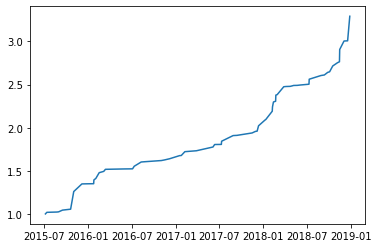

In [204]:
import matplotlib.pyplot as plt
plt.plot([datetime.utcfromtimestamp(x.tolist()/1e9) for x in dates], pnls[1:])